### System wypożyczenia rowerów w Londynie

W niniejszej analizie wykorzystany zostanie zbiór danych "London bike sharing dataset" pobrany ze strony kaggle.com i jest dostępny pod linkiem: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

Zbiór zawiera informacje dotyczące systemu wypożyczeń rowerów w Londynie. Dane prezentują ilość nowych wypożyczeń rowerów w ujęciu godzinowym w ciągu dwóch lat: od 4 stycznia 2015r. do 03 stycznia 2017r.

Zbiór składa się z 10 kolumn, każda z nich zawiera 17414 wierszy z danymi:

1. timestamp - kolumna zawiera datę i godzinę - dane w zbiorze zostały pogrupowane godzinowo,
2. cnt - ilość nowych wypożyczeń na godzinę (dane ilościowe),
3. t1 - temperatura (dane ilościowe),
4. t2 - temperatura odczuwalna (dane ilościowe),
5. hum - wilgotność powietrza (dane ilościowe),
6. wind_speed - prędkość wiatru (dane ilościowe),
7. weather_code - rodzaj pogody (dane jakościowe),
8. is_holiday - informacja o tym, czy dzień był świąteczny, czy nieświąteczny (dane jakościowe),
9. is_weekend - informacja o tym, czy dzień był pracujący, czy weekend(dane jakościowe),
10. season - pora roku (dane jakościowe).



In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
data_frame = pd.read_csv('./london_merged.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Z ogólnego podsumowania tabeli możemy dowiedzieć się, że wszystkie kolumny, za wyjątkiem timestamp zawierającej datę i czas zapisu, zawierają dane liczbowe, ponieważ w kolumnach, gdzie występowały dane jakościowe zostały one odpowiednio zakodowane za pomocą liczb - sposób kodowania zostanie przeze mnie opisany przy analizie każdej kolumny.

Dzięki tabeli podsumowującej wiemy też, że w zbiorze nie występują brakujące obserwacje, gdyż suma wpisów niepustych dla każdej zmiennej jest równa sumie wierszy. Możemy to potwierdzić sprawdzając jeszcze ilość pustych wpisów w zbiorze.


In [4]:
data_frame.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Wywołanie funkcji `isnull` na zbiorze potwierdza, że nie mamy pustych wpisów, więc możemy przejść do dalszych działań.

In [5]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


Podsumowując dane funkcją `describe` możemy wysunąć pierwsze wnioski. Średnia ilość wypożyczeń rowerów na godzinę to ok. 1143. Maksymalna ilość wypożyczeń na godzinę to 7860, a minimalna ilość wypożyczeń na godzinę to 0.

Z podsumowania możemy też odczytać średnią temperaturę - ok. 12,47 stopni, a średnia temperatura odczuwalna jest o ok. 1 stopnień niższa i wynosi ok. 11,52 stopnia. 

Maksymalna i minimalna odnotowana temperatura to 34 i -1,5 a wartości dla temperatury odczuwalnej to odpowiednio 34 i -6 stopnie.

Z pozostałych warunków pogodowych jesteśmy w stanie także określić średnią wilgotność powietrza to 72,32% , wartości maksymalna i mininalna to odpowiednio 100% i 20,5%. Średnia prędkość wiatru to 15,9 przy minimalnej 0 i maksymalnej 56,5.

Teraz przejdę do dokładniejszej analizy każdej kolumny.

## Ilość wypożyczeń
W pierwszej kolejności przyjrzymy się danym dotyczącym liczby wypożyczeń. W zbiorze dane dot. ilości nowych wypożyczeń są pogrupowane godzinowo, jednak wykres dla ilości wypożyczeń na godzinę byłby praktycznie nieczytelny, dlatego postanowiłam dodać kolumny zawierające informacje o roku, miesiącu, dniu tygodnia, a także kolumnę z godziną dla lepszego zrozumienia danych.

In [19]:
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
data_frame.set_index(data_frame['timestamp'], inplace=True)
data_frame['year'] = data_frame['timestamp'].dt.year
data_frame['month'] = data_frame['timestamp'].dt.month
data_frame['hour'] = data_frame['timestamp'].dt.hour
data_frame["day_of_week"]  = data_frame.index.dayofweek
data_frame

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_week,hour
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21


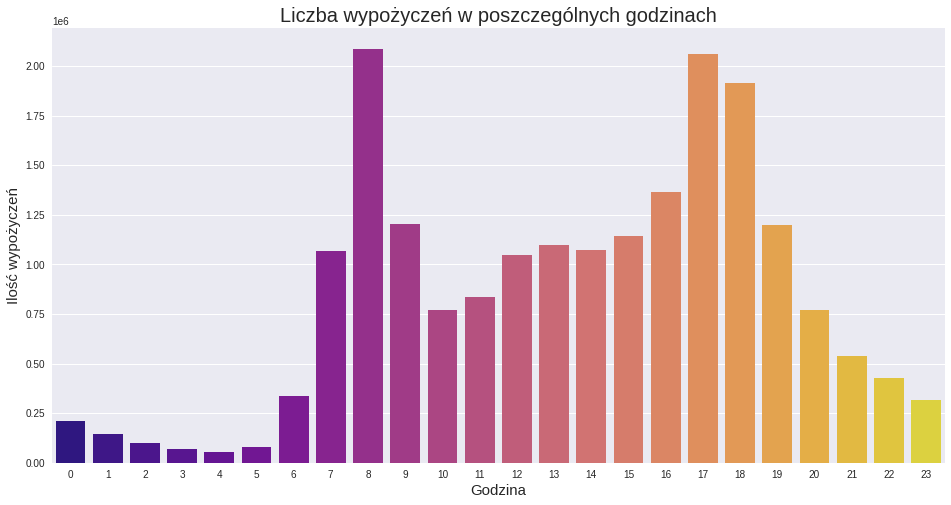

In [30]:
cnt_by_hour = data_frame.copy()
cnt_by_hour = cnt_by_hour.groupby(['hour'])['cnt'].sum()
cnt_by_hour = cnt_by_hour.reset_index()
sns.barplot(x='hour',y='cnt',data=cnt_by_hour, palette ='plasma')
plt.title('Liczba wypożyczeń w poszczególnych godzinach', fontsize=20)
plt.xlabel("Godzina", size=15)
plt.ylabel("Ilość wypożyczeń", size=15)
plt.show()

In [28]:
cnt_by_hour.sort_values(by='cnt', ascending=False)

,hour,cnt
8,8,2087164
17,17,2059938
18,18,1913944
16,16,1364955
9,9,1201745
19,19,1200648
15,15,1140609
13,13,1096178
14,14,1071619
7,7,1066309


Dane w zbiorze są pogrupowane godzinowo dla każdego dnia, dlatego łatwo wyciągnąć z niego informacje o ilości wypożyczeń w poszczególnych godzinach. Najwięcej wypożyczeń było o godz. 8, później o godz. 17 i 18. Bardziej popularne były godziny popołudniowe, ponieważ wśród pierwszych dziesięciu wyników z największą ilością wypożyczeń znajdują się tylko trzy poranne godziny: 8, 9 oraz 7, pozostałe to godziny popołudniowe, na wykresie także widać, że słupki dla godzin popołudniowych są przeważnie wyższe. Najmniej wypożyczeń miało miejsce o godzinie 4 oraz w pozostałych w godzinach nocnych.

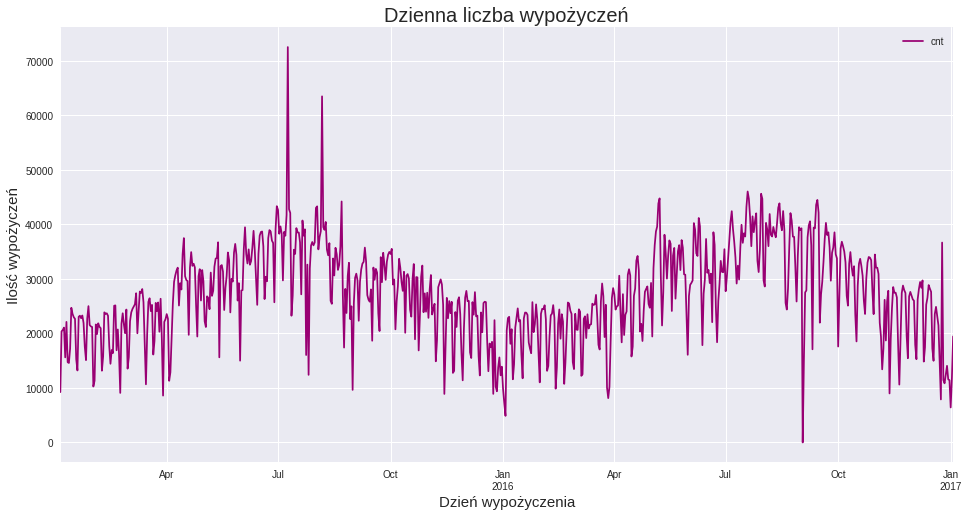

In [7]:
days = data_frame.resample('D').sum()
days.plot(y='cnt', color='#990073')
plt.title('Dzienna liczba wypożyczeń', fontsize=20)
plt.xlabel("Dzień wypożyczenia", size=15)
plt.ylabel("Ilość wypożyczeń", size=15)
plt.show()

Z poniższego wykresu możemy wywnioskować, że liczba dziennych wypożyczeń wzrastała w pierwszej i spadała w drugiej połowie każdego roku.

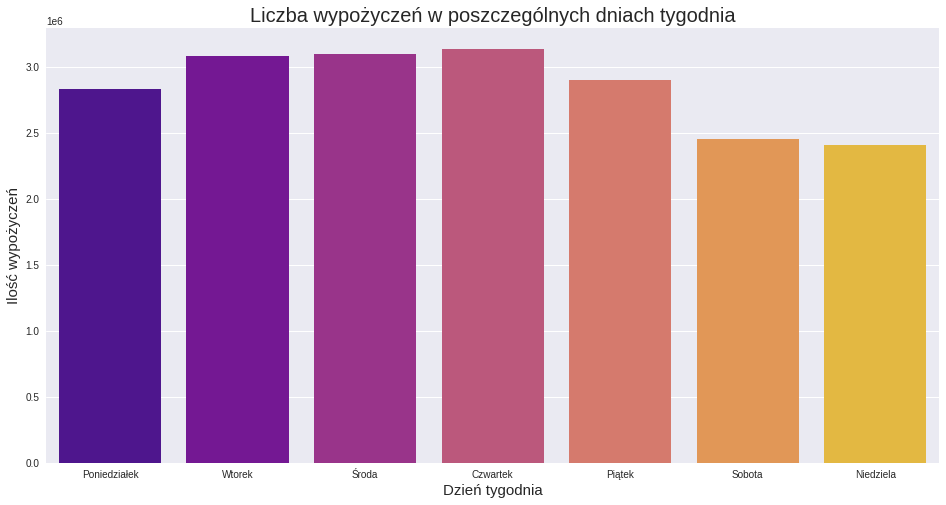

In [8]:
def day_name(day_name):
    return day_names.get(day_name)

day_names = {0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'}

cnt_by_day_of_week = data_frame.copy()
cnt_by_day_of_week = cnt_by_day_of_week.groupby(['day_of_week'])['cnt'].sum()
cnt_by_day_of_week = cnt_by_day_of_week.reset_index()
cnt_by_day_of_week['day_of_week'] = cnt_by_day_of_week['day_of_week'].apply(day_name)
sns.barplot(x='day_of_week',y='cnt',data=cnt_by_day_of_week, palette ='plasma')
plt.title('Liczba wypożyczeń w poszczególnych dniach tygodnia', fontsize=20)
plt.xlabel("Dzień tygodnia", size=15)
plt.ylabel("Ilość wypożyczeń", size=15)
plt.show()

In [9]:
cnt_by_day_of_week.sort_values(by='cnt', ascending=False)

,day_of_week,cnt
3,Czwartek,3136956
2,Środa,3097334
1,Wtorek,3081414
4,Piątek,2897793
0,Poniedziałek,2834719
5,Sobota,2454040
6,Niedziela,2403716


Zliczając ilość wypożyczeń dla każdego dnia tygodnia, dowiadujemy się, że najwięcej wypożyczeń było w czwartki (3 136 956), niewiele mniej w środy i wtorki - odpowiednio 3 097 334 i 3 081 414. W dni pracujące najmniejsza liczba wypożyczeń miała miejsce w piątki (2 897 719) oraz poniedziałki (2 834 719). Dni weekedowe okazały się dniami, podczas których odnotowano najmniej wypożyczeń, w soboty 2 454 040, a w niedziele 2 403 716.

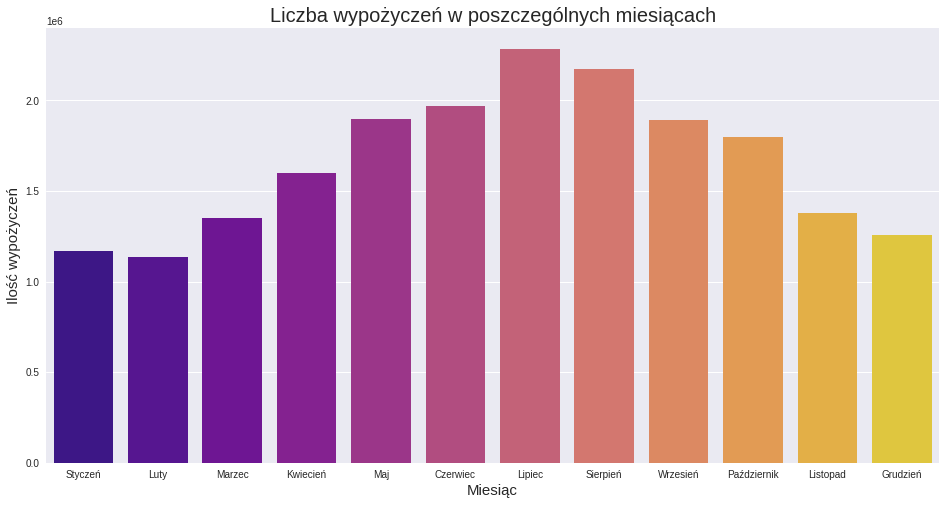

In [10]:
def month_name(month):
    return month_names.get(month)

month_names = {1: 'Styczeń', 2: 'Luty', 3: 'Marzec', 4: 'Kwiecień', 5: 'Maj', 6: 'Czerwiec', 7: 'Lipiec',
              8: 'Sierpień', 9: 'Wrzesień', 10: 'Październik', 11: 'Listopad', 12: 'Grudzień'}

cnt_by_month = data_frame.copy()
cnt_by_month = cnt_by_month.groupby(['month'])['cnt'].sum()
cnt_by_month = cnt_by_month.reset_index()
cnt_by_month['month'] = cnt_by_month['month'].apply(month_name)
sns.barplot(x='month',y='cnt',data=cnt_by_month, palette ='plasma')
plt.title('Liczba wypożyczeń w poszczególnych miesiącach', fontsize=20)
plt.xlabel("Miesiąc", size=15)
plt.ylabel("Ilość wypożyczeń", size=15)
plt.show()

In [20]:
cnt_by_month.sort_values(by='cnt', ascending=False)

,month,cnt
6,Lipiec,2286214
7,Sierpień,2171265
5,Czerwiec,1967130
4,Maj,1897348
8,Wrzesień,1891097
9,Październik,1800752
3,Kwiecień,1600427
10,Listopad,1381191
2,Marzec,1352461
11,Grudzień,1254746


Podsumowanie danych ilości wypożyczeń dla poszczególnych miesięcy potwierdza to, co wyczytaliśmy z pierwszego wykresu liniowego dot. dziennej liczby wypożyczeń - liczba wypożyczeń wzrasta w pierwszej połowie roku, a w drugiej spada. Najbardziej popularnym miesiącem dla wypożyczeń był lipiec (2 286 214), a później sierpień (2 171 265). Słupki dla miesięcy: maja, czerwca, września i października są podobnej wysokości - te miesiące były kolejno miesiącami z największymi ilościami wypożyczeń. Najmniej popularny był luty (1 136 504), a zaraz za nim styczeń (1 116 837) i grudzień (1 254 746).

Wiemy już jak przedstawiały się ilości wypożyczeń w zestawieniu z danymi czasowymi, kolejno przyjrzymy się już danych dot. samej zmiennej.

In [6]:
data_frame['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

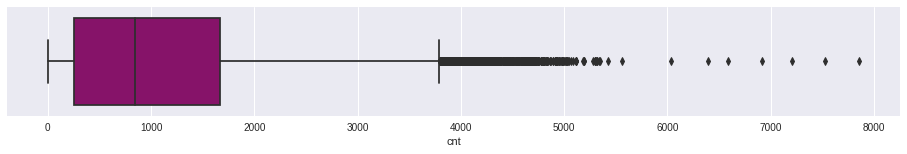

In [7]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='cnt',data=data_frame, color='#990073')
plt.show()

Powyższy wykres pudełkowy oraz tabela podsumowująca dla kolumny zawierającej informację o liczbie wypożyczeń pozwala nam na wyciągnięcie następujących wniosków:<br>
1. Średnia ilość wypożyczeń to 1143.
2. Mediana (kwantyl rzędu 0,5 na podsumowaniu oznaczony jako 50%) ilości wypożyczeń to 844 (na wykresie pudełkowym jest oznaczona pionową kreską węwnątrz pudełka), a oznacza to, że 50% wartości z kolumny wypożyczeń jest mniejsze od 844, a drugie 50% jest od niej większe. Położenie mediany bardziej po lewej stronie pudełka sugeruje, że rozkład wartości nie jest symetryczny.
3. 25% wartości kolumny z ilością wypożyczeń jest mniejsze od 257, a 75% wartości jest mniejsze od 1671,75 - patrząc na wykres pudełkowy, są to lewa i prawa krawędź pudełka.
4. Z tabeli podsumowującej możemy odczytać też wartości minimalną - 0 i maksymalną - 7860.
5. Wartość minimalna jest też początkiem "wąsów" wykresu, jednak wartość maksymalna nie jest jego końcem. Prawa część "wąsów" wykresu jest dosyć długa, co świadczy o znacznym rozproszeniu danych - przyjmują one bardzo różniące się od siebie wartości. 
4. Na wykresie widać także, ze występuje dużo wartości powyżej prawej granicy "wąsa". Są oznaczone znacznikami i obrazują obserwacje odstające, czyli wartości nietypowych, znacząco odbiegających od reszty. Wykres potwierdza, że dla zmiennej dotyczącej ilości wypożyczeń jest dużo takich wartości.

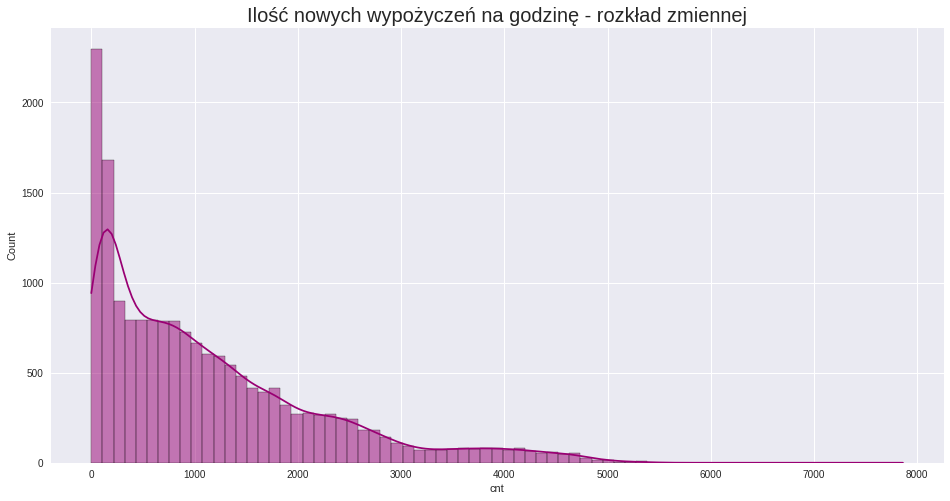

In [8]:
sns.histplot(x='cnt',data=data_frame, kde=True, color='#990073')
plt.title('Ilość nowych wypożyczeń na godzinę - rozkład zmiennej', size=20)
plt.show()

Histogram dla zmiennej dot. ilości wypożyczeń pozwala na wysunięcie następujących wniosków:
1. Łatwo ocenić jakich wartości jest w rozkładzie najwięcej - są to wartości z przedziałów 0-100 oraz 101-200.
1. Rozkład nie jest symetryczny - na histogramie wyraźnie widać, że rozkład jest prawoskośny - szczyt wykresu jest po lewej stronie, a większość wyników jest mniejszych niż średnia (1143). Oznacza to, że prawdopodobieństwo wystąpienia wyników mniejszych niż średnia jest większe, niż prawdopodobieństwo wystąpienia wyników większych niż średnia.
2. Rozkład tej zmiennej jest platokurtyczny, ma tzw. ciężki ogon - występuje tu dużo wartości skrajnych, oddalonych od średniej. Co mogą potwierdzać nam wartości: minimalna - 0, średnia - 1143 i wartość maksymalna - 7860. Patrząc na histogram widać, że między średnią a wartością maksymalaną, zmienna przyjmuje bardzo różne wartości.

## Temperatura

Kolejną zmienną występującą w zbiorze jest temperatura. Zestawiając ze sobą ilość wypożyczeń i panujące wtedy temperatury na poniższym wykresie, widzimy, że wraz ze wzrostem temperatury rośnie ilość wypożyczeń.

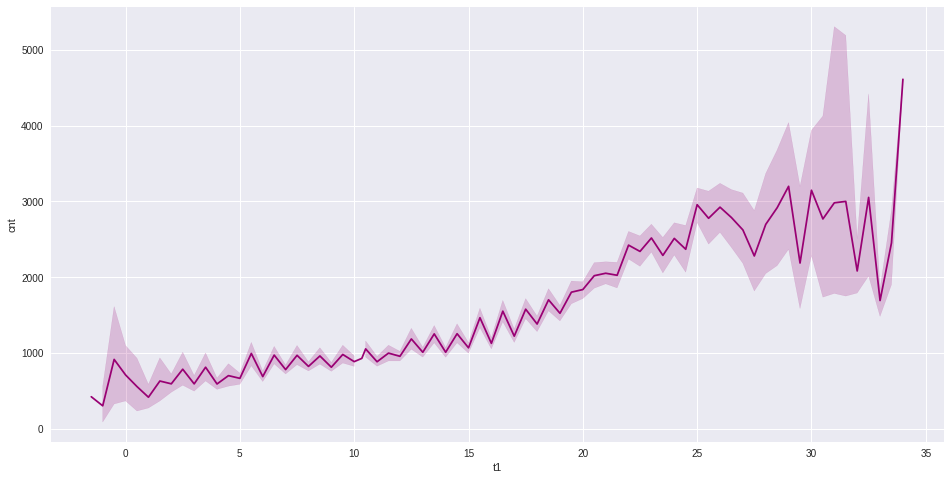

In [9]:
sns.lineplot(x='t1',y='cnt',data=data_frame, color='#990073')
plt.show()

In [10]:
data_frame['t1'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

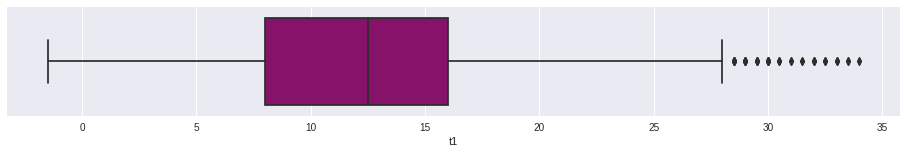

In [11]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='t1',data=data_frame, color='#990073')
plt.show()

Aby lepiej poznać rozkład zmiennej dot. temperatury, ponownie wykorzystamy wykres pudełkowy oraz podsumowanie `desribe` kolumny dot. temperatury. Wykres pudełkowy, który w porównaniu do poprzedniego dla ilości wypożyczeń wygląda nieco inaczej - jest bardziej symetryczny.
Wnioski:
1. Średnia temperatura to ok. 12,5 stopnia
2. Mediana jest równa średniej temperaturze i także wynosi ok. 12,5 stopnia. Na wykresie jest oznaczona pionową kreską wewnątrz pudełka, kreska znajduje się bardziej po prawej stronie pudełka. Dzięki tej wartości wiemy, że 50% wartości jest mniejsza od 12,5 stopnia, a drugie 50% wartości jest od niego większa.
3. 25% wartości jest mniejsze od 8 stopni, a 75% wrtości jest mniejsze od 16 stopni. Oznacza to, że najwięcej wartości występuje w tym przedziale - 8-16 i jest to obszar pudełka na wykresie.
3. Z tabeli podsumowującej możemy odczytać wartość minimalną -1,5 stopnia oraz maksymalną - 34 stopnie.
3. "Wąsy" wykresu są bardziej symetryczne, chociaż ich prawa część jest nieco dłuższa - oznacza to, że więcej różnych wartości występowało powyżej 16 stopni.
3. Lewa krawędź "wąsów" zaczyna się od wartości minimalnej: -1,5 stopnia, ale nie kończy na wartości maksymalnej, tylko na wartości 28 stopni. Wartość maksymalna jest jedną z obserwacji odstających, nietypowych oznaczonych jednym ze znaczników poza obszarem "wąsów". W porównaniu do wykresu pudełkowego dla ilości wypożyczeń ilość obserwacji odstających nie jest tak duża.

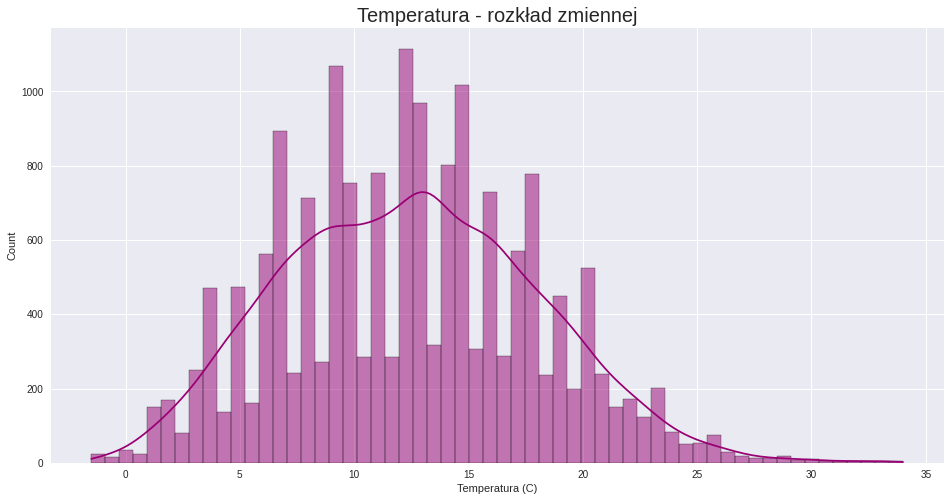

In [12]:
sns.histplot(x='t1',data=data_frame, kde=True, color='#990073')
plt.xlabel('Temperatura (C)')
plt.title('Temperatura - rozkład zmiennej', size=20)
plt.show()

Histogram dla temperatury potwierdza wcześniejsze wnioski. 
1. Rozkład wydaje się symetryczny, możemy to potwierdzić za pomocą danych z tabeli podsumowującej - mediana i średnia są praktycznie takie same (12,5 stopnia), a najczęściej występująca wartość to ok. 12-13 stopni.
2. Rozkład jest mezokurtyczny, co oznacza, że ilość wartości skrajnych jest mała.

## Temperatura odczuwalna
Kolejna kolumna także dotyczy temperatury, ale tym razem są to wartości temperatury odczuwalnej. Na poniższym wykresie gdzie zestawiamy ją z ilością wypożyczeń, możemy zauważyć, że wykres wygląda bardzo podobnie do tego, gdzie zestawialiśmy ze sobą temperaturę i ilość wypożyczeń. 

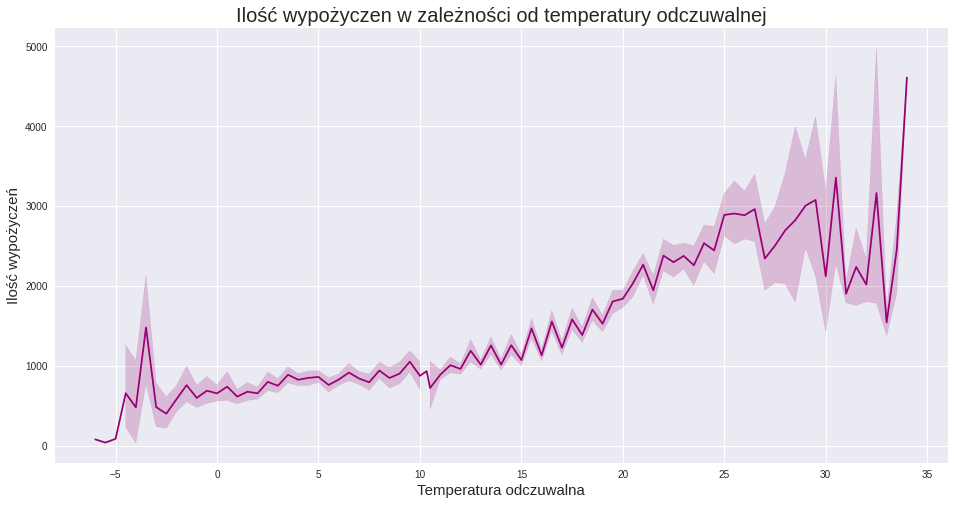

In [13]:
sns.lineplot(x='t2',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Temperatura odczuwalna', size=15)
plt.ylabel('Ilość wypożyczeń', size=15)
plt.title("Ilość wypożyczen w zależności od temperatury odczuwalnej", size=20)
plt.show()

In [14]:
data_frame['t2'].describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t2, dtype: float64

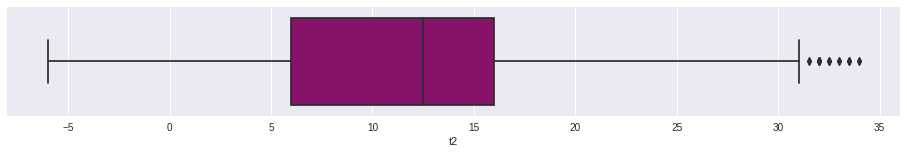

In [15]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='t2',data=data_frame, color='#990073')
plt.show()

Wywołując funkcję `describe` dla temperatury odczuwalnej oraz tworząc dla niej wykres pudełkowy, możemy dowiedzieć się, że:
1. Średnia temperatura odczuwalna jest niższa od faktycznie odnotowanej temperatury i wynosi ona ok. 11.5 stopnia.
2. Mediana jest równa 12,5 stopnia, na wykresie jest oznaczona pionową kreską wewnątrz pudełka, kreska znajduje się bardziej po prawej stronie pudełka. Dzięki tej wartości wiemy, że 50% wartości jest mniejsza od 12,5 stopnia, a drugie 50% wartości jest od niej większa.
2. 25% wartości jest mniejsze od 6 stopni, a 75% wrtości jest mniejsze od 16 stopni. Oznacza to, że najwięcej wartości występuje w tym przedziale - 6-16 i jest to obszar pudełka na wykresie.
3. Z tabeli podsumowującej możemy odczytać wartość minimalną -6 stopnia oraz maksymalną - 34 stopnie.
4. Podobnie jak dla wykresu pudełkowego dla temperatury "wąsy" wykresu wydają się symetryczne, jednak ich prawa część jest jednak dłuższa, co mówi nam, że występowało więcej różnych wartości powyżej 16 stopni niż po lewej stronie pudełka (poniżej 6 stopni).
3. Lewa krawędź "wąsów" zaczyna się od wartości minimalnej: -6 stopni, ale również nie kończy na wartości maksymalnej, tylko na wartości 28 stopni.
3. Wartość maksymalna (34 stopnie)jest jedną z obserwacji odstających, nietypowych oznaczonych jednym ze znaczników poza obszarem "wąsów". Podobnie jak dla wykresu dotyczącego temperatury ilość obserwacji odstających nie jest duża.


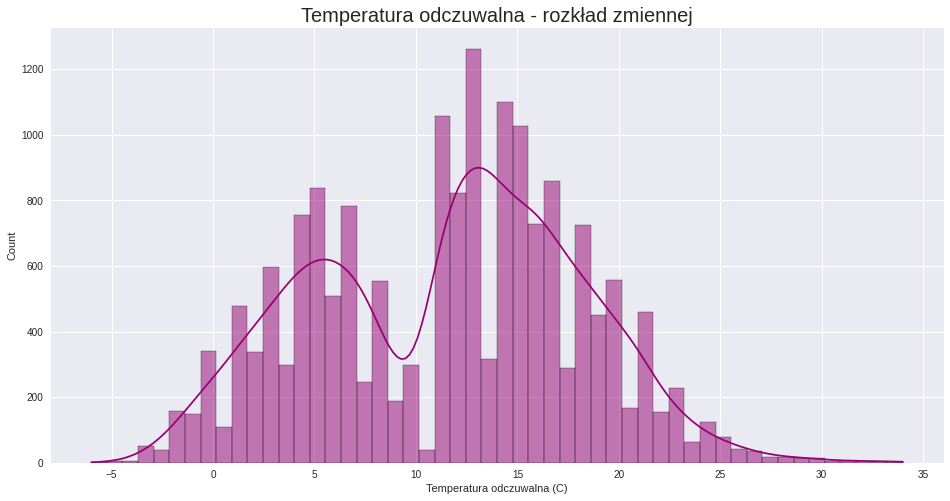

In [17]:
sns.histplot(x='t2',data=data_frame,kde=True,  color='#990073')
plt.xlabel('Temperatura odczuwalna (C)')
plt.title('Temperatura odczuwalna - rozkład zmiennej', size=20)
plt.show()

Histogram dla temperatury odczuwalnej potwierdza wcześniejsze wnioski.
1. Rozkład wydaje się być prawie symetryczny, a mediana (12,5 stopnia) oraz średnia (11,5) i wartość występująca najcześćiej ok 12-13 stopni są porównywalne.
2. Także ten rozkład jest mezokurtyczny, co oznacza, że ilość wartości skrajnych jest mała podobnie jak w wykresie dla temperatury.

## Wilgotność powietrza
Kolejną zmienną występującą w zbiorze jest wilgotność powietrza.

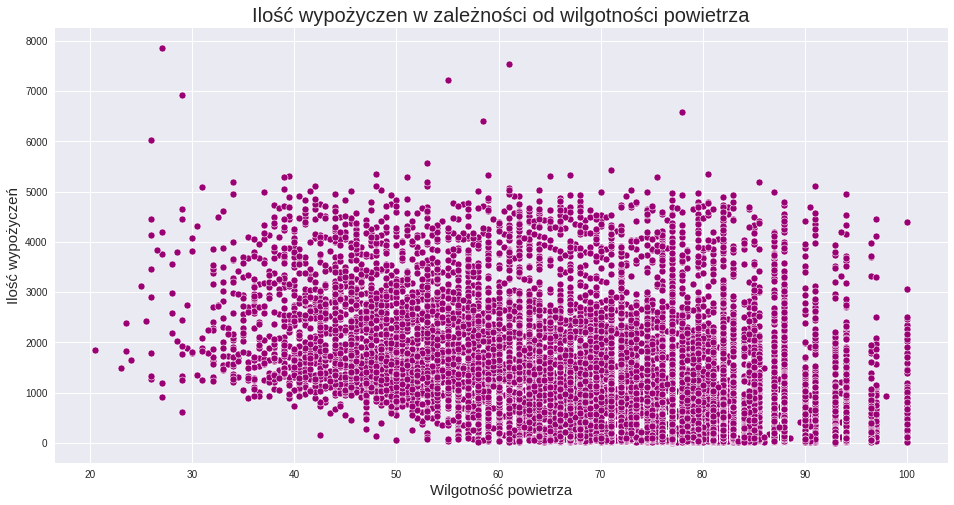

In [18]:
sns.scatterplot(x='hum',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Wilgotność powietrza', size=15)
plt.ylabel('Ilość wypożyczeń', size=15)
plt.title("Ilość wypożyczen w zależności od wilgotności powietrza", size=20)
plt.show()

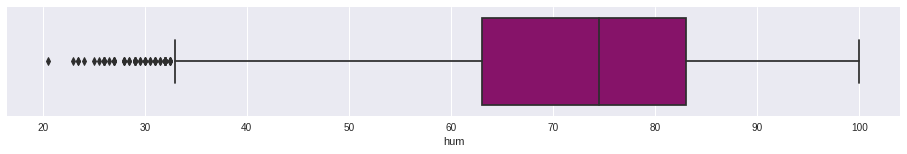

In [19]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='hum',data=data_frame, color='#990073')
plt.show()

In [20]:
data_frame['hum'].describe()

count    17414.000000
mean        72.324954
std         14.313186
min         20.500000
25%         63.000000
50%         74.500000
75%         83.000000
max        100.000000
Name: hum, dtype: float64

Patrząc na podsumowanie dla kolumny dot. wilgotności oraz na wykres pudełkowy dla tej zmiennej, wnioskujemy:
1. Średnia wilgotność powietrza w tym badanym okresie to 72,32%. 
2. Mediana to 74,5% - zaznaczona pionową kreską w środku pudełka na wykresie. Jest ona bardziej po prawej stronie pudełka. Zatem wiemy, że 50% wartości dla wilgotności powietrza będzie mniejsze niż 74,5%, a pozostałe 50% będzie większe.
2. 25% wartości jest mniejsze niż 63%, a 75% jest mniejsze niż 83%. Są to brzegi pudełka na wykresie i mówi nam to, że najwięcej wartości dla tej zmiennej mieści się w przedziale 63-83%.
2. Wartość maksymalna to 100% i jest to prawa granica "wąsów" wykresu, wartość minimalna 20,5% jest jedną z wartości odstających oznaczonych znacznikami po lewej stronie od lewej granicy "wąsów". Liczba wartości skrajnych wydaje się duża.

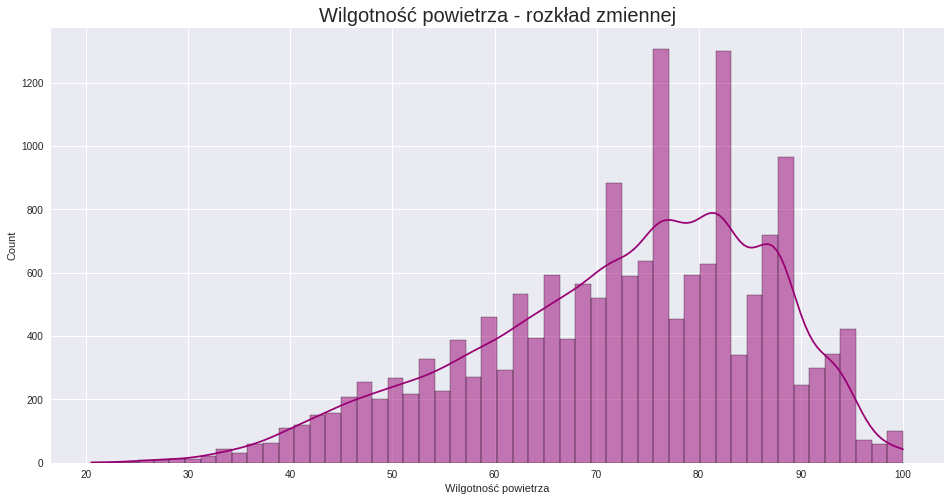

In [21]:
sns.histplot(x='hum',data=data_frame,kde=True, color='#990073')
plt.xlabel('Wilgotność powietrza')
plt.title('Wilgotność powietrza - rozkład zmiennej', size=20)
plt.show()

Histogram dla danych dotyczących wilgotności powietrza pozwala zawuażyć:
1. Najczęściej występujące wartości to ok 76% oraz 83%.
2. Rozkład nie jest symetryczny i wydaje się być lewoskośny, szczyt wykresu jest po jego prawej stronie.
3. Zmienna ma tzw. ciężki ogon z lewej strony występuje dużo wartości skrajnych, oddalonych od średniej.

## Prędkość wiatru
Przejdźmy teraz do analizy danych w kolumnie dot. prędkości wiatru

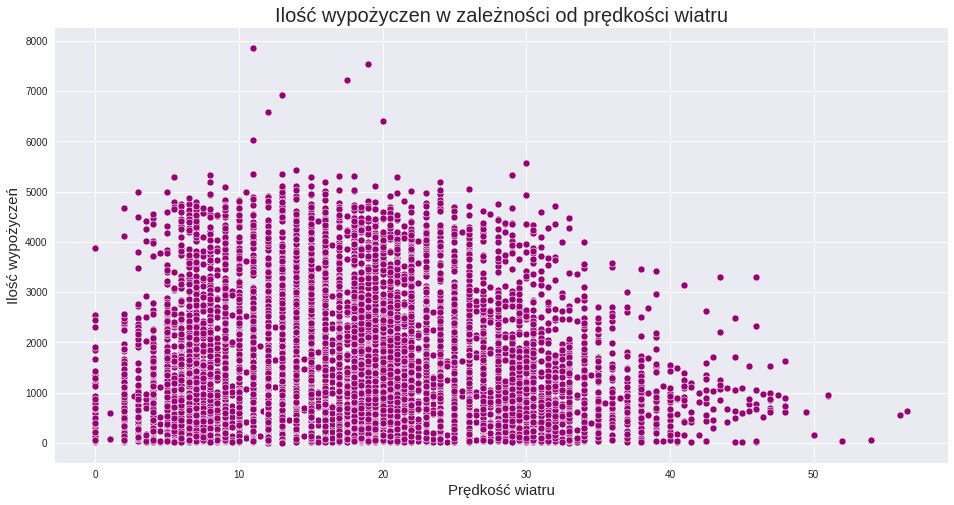

In [22]:
sns.scatterplot(x='wind_speed',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Prędkość wiatru', size=15)
plt.ylabel('Ilość wypożyczeń', size=15)
plt.title("Ilość wypożyczen w zależności od prędkości wiatru", size=20)
plt.show()

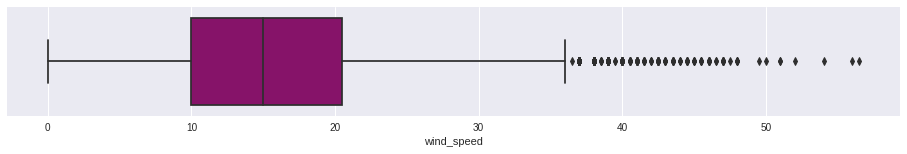

In [65]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='wind_speed',data=data_frame, color='#990073')
plt.show()

In [51]:
data_frame['wind_speed'].describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

Analizując dane dla kolumny dot. prędkości wiatru oraz na wykres pudełkowy dla tej zmiennej, możemy wnioskować:
- Średnia prędkość wiatru w badanym okresie to 15,91.
- Mediana to 15 - zaznaczona pionową kreską w środku pudełka na wykresie. Kreska jest blisko środka pudełka, ale niec po jego lewej stronie. Zatem wiemy, że 50% wartości dla prędkości powietrza będzie mniejsza niż 15, a pozostałe 50% będzie od niego większe.
- 25% wartości jest mniejsze niż 10, a 75% jest mniejsze niż 20,5. Są to brzegi pudełka na wykresie i mówi nam to, że najwięcej wartości dla tej zmiennej mieści się w przedziale 10-20,5.
- Minimalna prędkość wiatru jaka wystąpiła w badanym okresie to 0 i jest to lewa granica "wąsów" wykresu, wartość maksymalna to 56,5 i jest ona najwyższą z wartości odstających oznaczonych znacznikami po prawej stronie od prawej granicy "wąsów" wykresu. Liczba wartości skrajnych wydaje się być duża.

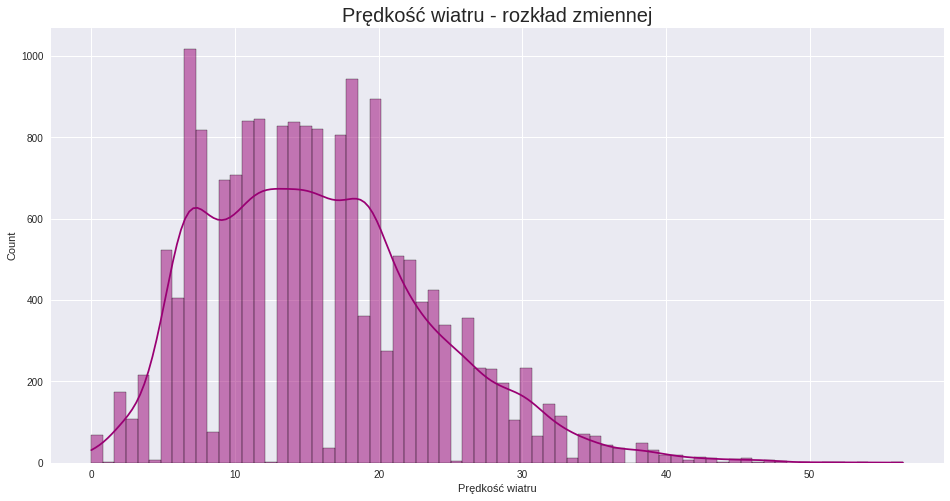

In [23]:
sns.histplot(x='wind_speed',data=data_frame,kde=True, color='#990073')
plt.xlabel('Prędkość wiatru')
plt.title('Prędkość wiatru - rozkład zmiennej', size=20)
plt.show()

Z histogramu dla prędkości wiatru możemy odczytać wartości występujące najczęściej jest to ok. 6-8, 16-18 i 20.
Rozkład jest lewoskośny i platokurtyczny, ma tzw. ciężki ogon po prawej stronie.

## Rodzaj pogody

Każdy rekord z godzinnym podsumowaniem ilości wypożyczeń rowerów zawierał także informację o panujących wtedy warunkach pogodowych.
Dane w kolumnie rodzaj pogody zostały oznaczone odpowiednimi kodami:<br>
       1 = Pogodnie, przeważnie czyste niebo,<br>
       2 = Rozproszone chmury,<br>
       3 = Częściowe zachmurzenie,<br>
       4 = Pochmurnie,<br>
       7 = Deszcz/lekki deszcz,<br>
       10 = Burza,<br>
       26 = Opady śniegu,<br>
       94 = Marznąca mgła.

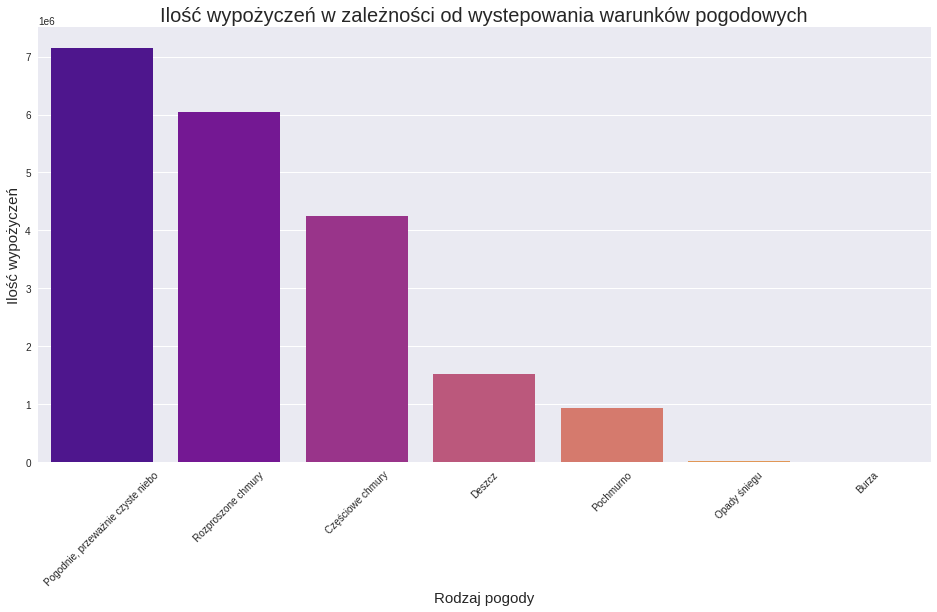

In [59]:
def weather_code_name(weather_code):
    return weather_codes.get(weather_code)


weather_codes = {1.0 : 'Pogodnie, przeważnie czyste niebo', 2.0 : 'Rozproszone chmury', 
                                   3.0 : 'Częściowe chmury', 7.0 : 'Deszcz', 4.0 : 'Pochmurno', 
                                   26.0 : 'Opady śniegu', 10.0 : 'Burza'}

cnt_by_weather = data_frame.copy()
cnt_by_weather['weather_code'] = cnt_by_weather['weather_code'].apply(weather_code_name) 
cnt_by_weather = cnt_by_weather.groupby(['weather_code'])['cnt'].sum()
cnt_by_weather = cnt_by_weather.reset_index()
sns.barplot(x='weather_code',y='cnt',data=cnt_by_weather, 
            order=cnt_by_weather.sort_values('cnt',ascending = False).weather_code, palette ='plasma')
plt.xticks( rotation=45)
plt.xlabel("Rodzaj pogody", size=15)
plt.ylabel("Ilość wypożyczeń", size=15)
plt.title("Ilość wypożyczeń w zależności od wystepowania warunków pogodowych", size=20)
plt.show()

In [58]:
cnt_by_weather.sort_values(by='cnt', ascending=False)

,weather_code,cnt
5,"Pogodnie, przeważnie czyste niebo",7146847
6,Rozproszone chmury,6035580
1,Częściowe chmury,4243887
2,Deszcz,1526461
4,Pochmurno,929978
3,Opady śniegu,15051
0,Burza,8168


Grupując dane w zależności od występujących podczas wypożyczenia warunków pogodowych i podliczając dla nich dane dotyczące ilości wypożyczeń, możemy wysunąc wnioski:
- najwięcej wypożyczeń miało miejsce podczas pogody "Pogodnie/Przeważnie czyste niebo"
- kolejno rowery były wypożyczane najczęściej podczas pogody: "Rozproszone chmury", a później podczas: "Częściowe zachmurzenie",
- kolejno uplasowały się "Pochmurno", a następnie deszcz: "Deszcz".
- znikoma ilość wypożyczeń miała miejsce podczas pogody: "Opady śniegu" i "Burza"

## Dni świąteczene i nieświąteczne

Dni w zbiorze zostały rozróżnione na świąteczne i nieświąteczne.

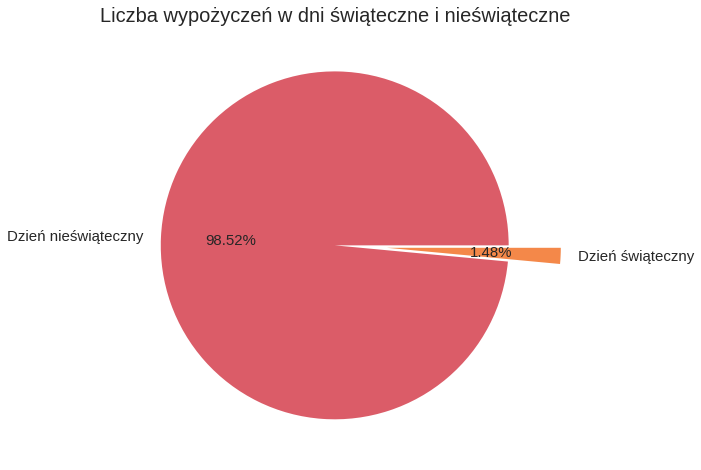

In [52]:
def holiday_or_not(day):
    return holidays.get(day)

holidays = {0.0 : 'Dzień nieświąteczny', 1.0 : 'Dzień świąteczny'}
    

cnt_by_holiday = data_frame.groupby(['is_holiday'])['cnt'].sum()
cnt_by_holiday = cnt_by_holiday.reset_index()
cnt_by_holiday['is_holiday'] = cnt_by_holiday['is_holiday'].apply(holiday_or_not)
colors = sns.color_palette('plasma')[3:5]
plt.pie(cnt_by_holiday['cnt'],explode=[0, .3],labels=cnt_by_holiday['is_holiday'],colors = colors, 
        autopct='%1.2f%%', textprops={'fontsize': 15})
plt.title('Liczba wypożyczeń w dni świąteczne i nieświąteczne', size=20)
plt.show()

In [54]:
cnt_by_holiday

,is_holiday,cnt
0,Dzień nieświąteczny,19610474
1,Dzień świąteczny,295498


Jeśli zsumujemy dane dotyczące wypożyczeń w zależności od tego, czy wypożyczenie miało miejsce w dzień zwykły, czy w dzień świąteczny okazuje się, że jedynie ok. 1,5% miało miejsce w dzień świąteczny, a pozostałe ok. 98,5% w dzień zwykły. Patrząc na liczby, było to odpowiednio 295 498 i 19 610 474 wypożyczeń.

### Weekend
Dni występujące w zbiorze zostały także rozróżnione na dni weekendowe (oznaczone jako 1) i dni zwykłe pracujące (oznaczone jako 0).

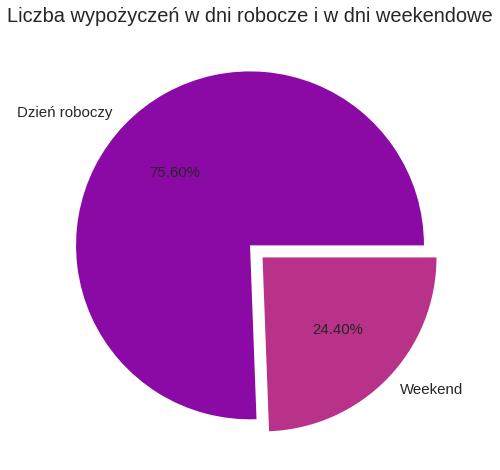

In [53]:
def weekend_or_not(day):
    return weekends.get(day)

weekends = {0.0 : 'Dzień roboczy', 1.0 : 'Weekend'}
    
cnt_by_weekend = data_frame.groupby(['is_weekend'])['cnt'].sum()
cnt_by_weekend = cnt_by_weekend.reset_index()
cnt_by_weekend['is_weekend'] = cnt_by_weekend['is_weekend'].apply(weekend_or_not)
colors = sns.color_palette('plasma')[1:3]
plt.pie(cnt_by_weekend['cnt'],explode=[0, .1],labels=cnt_by_weekend['is_weekend'], colors = colors, 
        autopct='%1.2f%%', textprops={'fontsize': 15})
plt.title('Liczba wypożyczeń w dni robocze i w dni weekendowe', size=20)
plt.show()


In [47]:
cnt_by_weekend

,is_weekend,cnt
0,Dzień roboczy,15048216
1,Weekend,4857756


Podsumowując ilość wypożyczeń w dni robocze i w weekendy, wychodzi na to, że ok. 3/4 wypożyczeń miało miejsce w dzień roboczy, a pozostała 1/4 w weekendy. Ilość wypożyczeń podczas weekendów to 4 857 756, a podczas dni roboczych to 15 048 216.

### Pory roku
Ostatnią kolumną w analizowanym zbiorze jest informacja o porze roku dla każdego wpisu. Informacja o tym, jaka była wtedy pora roku także została zakodowana: <br>0 - Wiosna; <br>1 - Lato; <br>2 - Jesień; <br>3 - Zima.

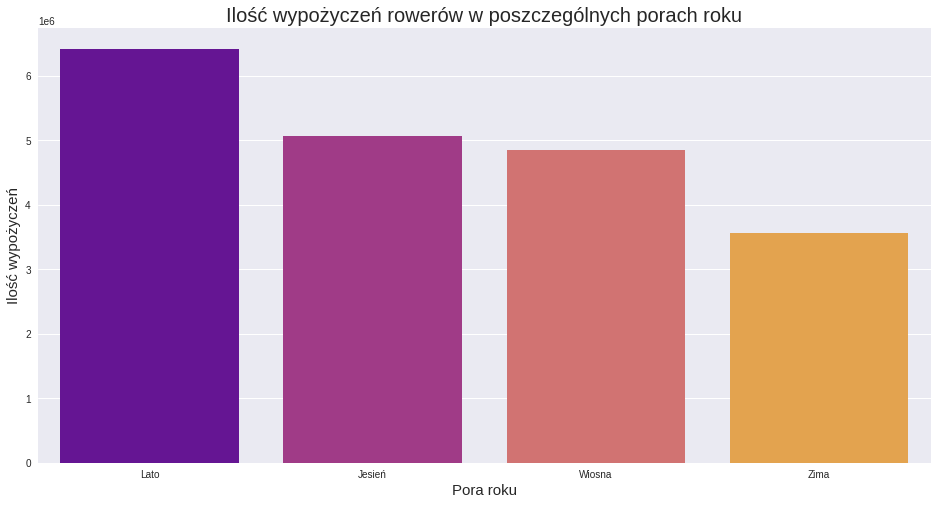

In [32]:
def season_name(season_code):
    return season_codes.get(season_code)

season_codes = {0.0 : 'Wiosna', 1.0 : 'Lato', 2.0 : 'Jesień', 3.0 : 'Zima'}

cnt_by_season = data_frame.copy()
cnt_by_season['season'] = cnt_by_season['season'].apply(season_name)
cnt_by_season = cnt_by_season.groupby(['season'])['cnt'].sum()
cnt_by_season = cnt_by_season.reset_index()
sns.barplot(data=cnt_by_season, x='season', y='cnt', order=cnt_by_season.sort_values('cnt',ascending = False).season, palette='plasma')
plt.xlabel('Pora roku', size =15)
plt.ylabel('Ilość wypożyczeń', size=15)
plt.title('Ilość wypożyczeń rowerów w poszczególnych porach roku', size=20)
plt.show()

In [33]:
cnt_by_season.sort_values(by='cnt', ascending=False)

,season,cnt
1,Lato,6424609
0,Jesień,5073040
2,Wiosna,4850236
3,Zima,3558087


Na koniec podsumujmy dane dotyczące ilości wypożyczeń w konkretnych porach roku. Najwięcej wypożyczeń miało miejsce Latem (6 424 609), potem Jesienią (5 073 040), trochę mniej wypożyczeń było wiosną (4 850 236), a najmniej wypożyczeń miało miejsce w Zimie (3 558 087).